<a href="https://colab.research.google.com/github/ShilpaSinghvi/AIML/blob/master/Predicting_Heart_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart rate to montior Stress level

### Steps
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Identify the better parameter using Cross Validation Mean Score
- Hyper Parameters Tuning for the best model identified in above step

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
sns.set_style(style='darkgrid') #Update default background style of plots

pd.options.display.float_format = '{:,.2f}'.format #Display all numbers with 2 decimal points

from sklearn.model_selection import train_test_split

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#ML model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# Read the datasets and store in dataframe
df_tm = pd.read_csv("/content/drive/My Drive/time_domain_features_train.csv") 
#df_fq = pd.read_csv("frequency_domain_features_train.csv")
#df_nl = pd.read_csv("heart_rate_non_linear_features_train.csv")

FileNotFoundError: ignored

In [12]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_tm.head(3)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.16,853.76,140.97,15.55,15.55,9.06,69.50,11.13,0.53,-0.86,0.34,-0.00,-0.00,0.02,0.01,0.01,2.14,-0.86,0.34,89df2855-56eb-4706-a23b-b39363dd605a
1,939.43,948.36,81.32,12.96,12.96,6.27,64.36,5.60,0.00,-0.41,-0.16,-0.00,0.00,0.01,0.00,0.00,2.93,-0.41,-0.16,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.19,907.01,84.50,16.31,16.31,5.18,67.45,13.07,0.20,0.35,-0.66,-0.00,-0.00,0.02,0.01,0.01,2.13,0.35,-0.66,c2d5d102-967c-487d-88f2-8b005a449f3e


In [ ]:
df_fq.head(3)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,"2,661.89",72.20,"1,009.25",27.38,98.49,15.52,0.42,1.51,"3,686.67",65.02,0.02
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,"2,314.27",76.98,690.11,22.95,99.70,2.11,0.07,0.30,"3,006.49",327.30,0.00
2,c2d5d102-967c-487d-88f2-8b005a449f3e,"1,373.89",51.15,"1,298.22",48.34,98.95,13.77,0.51,1.05,"2,685.88",94.28,0.01


In [ ]:
df_nl.head(3)

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.00,199.06,2.14,1.16,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.17,114.63,2.17,1.08,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.53,118.94,2.14,1.18,2,interruption


In [ ]:
print (df_fq.shape, df_tm.shape, df_nl.shape)

(369289, 12) (369289, 20) (369289, 7)


### Join the three datasets on field "uuid" & get a single dataset

In [ ]:
df_jn1 = pd.merge(df_tm,df_fq,how='inner',on='uuid')
df = pd.merge(df_jn1,df_nl,how='inner',on='uuid')

In [ ]:
df.head(3)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.16,853.76,140.97,15.55,15.55,9.06,69.50,11.13,0.53,-0.86,...,1.51,"3,686.67",65.02,0.02,11.00,199.06,2.14,1.16,2,no stress
1,939.43,948.36,81.32,12.96,12.96,6.27,64.36,5.60,0.00,-0.41,...,0.30,"3,006.49",327.30,0.00,9.17,114.63,2.17,1.08,2,interruption
2,898.19,907.01,84.50,16.31,16.31,5.18,67.45,13.07,0.20,0.35,...,1.05,"2,685.88",94.28,0.01,11.53,118.94,2.14,1.18,2,interruption


In [ ]:
df.shape

(369289, 37)

### Split into Train & Test data

### Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [ ]:
df.drop('datasetId',axis=1,inplace=True)
df.drop('uuid',axis=1,inplace=True)

In [ ]:
# Total 36 independent and 1 dependent variable
df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen',
       'higuci', 'condition'],
      dtype='object')

In [ ]:
# No NULL values in data 
df.isnull().any()

MEAN_RR              False
MEDIAN_RR            False
SDRR                 False
RMSSD                False
SDSD                 False
SDRR_RMSSD           False
HR                   False
pNN25                False
pNN50                False
KURT                 False
SKEW                 False
MEAN_REL_RR          False
MEDIAN_REL_RR        False
SDRR_REL_RR          False
RMSSD_REL_RR         False
SDSD_REL_RR          False
SDRR_RMSSD_REL_RR    False
KURT_REL_RR          False
SKEW_REL_RR          False
VLF                  False
VLF_PCT              False
LF                   False
LF_PCT               False
LF_NU                False
HF                   False
HF_PCT               False
HF_NU                False
TP                   False
LF_HF                False
HF_LF                False
SD1                  False
SD2                  False
sampen               False
higuci               False
condition            False
dtype: bool

### Print the descriptive statistics of all the columns using describe() function

In [ ]:
df.describe().transpose()

## Inference -
# For the fields slag, ash & age - there is a variance in mean and median. There may be outliers in these fields.
# For other fields mean and median are almost same, suggests symmetrical distribution of data

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,"369,289.00",846.65,124.60,547.49,760.23,822.95,924.12,"1,322.02"
MEDIAN_RR,"369,289.00",841.97,132.32,517.29,755.75,819.69,916.82,"1,653.12"
SDRR,"369,289.00",109.35,77.12,27.23,64.21,82.61,118.24,563.49
RMSSD,"369,289.00",14.98,4.12,5.53,11.83,14.42,17.93,26.63
SDSD,"369,289.00",14.98,4.12,5.53,11.83,14.42,17.92,26.63
SDRR_RMSSD,"369,289.00",7.40,5.14,2.66,4.54,5.95,7.92,54.52
HR,"369,289.00",73.94,10.34,48.74,66.72,74.22,80.33,113.75
pNN25,"369,289.00",9.84,8.20,0.00,3.67,7.60,13.33,39.40
pNN50,"369,289.00",0.87,0.99,0.00,0.00,0.47,1.47,5.47
KURT,"369,289.00",0.52,1.79,-1.89,-0.35,0.04,0.72,64.09


#### Using univariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails, outliers, etc

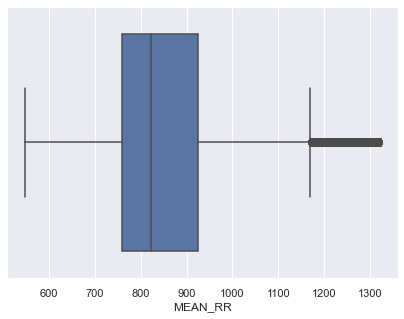

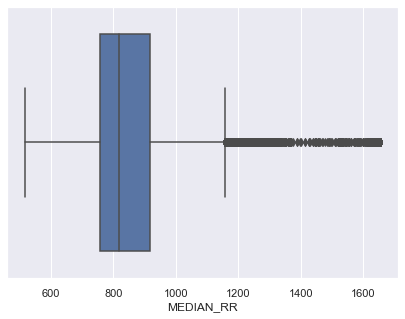

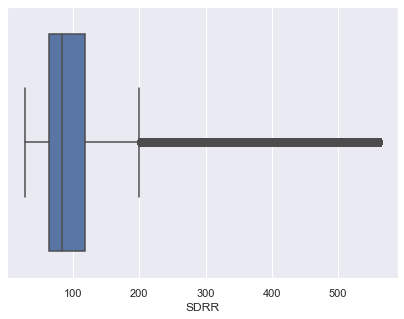

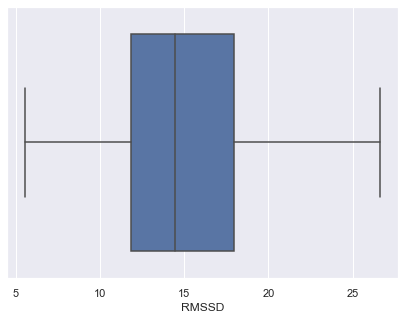

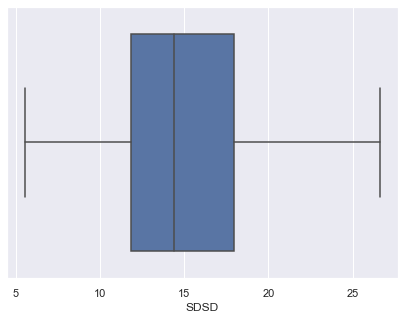

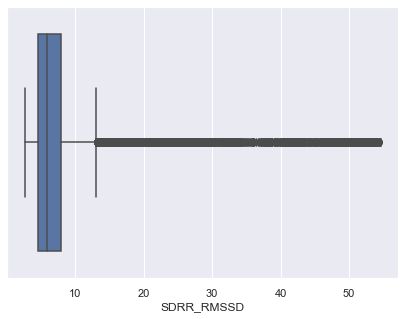

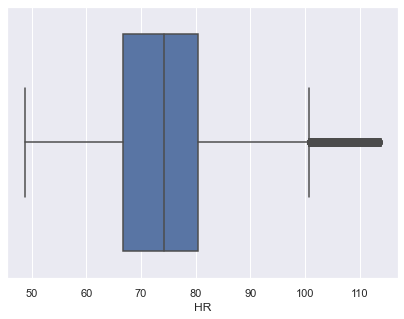

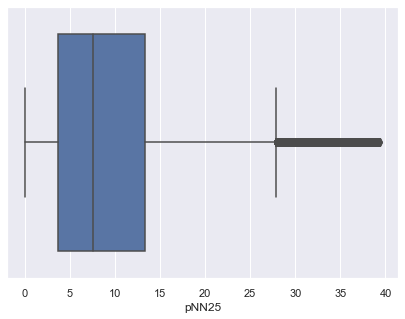

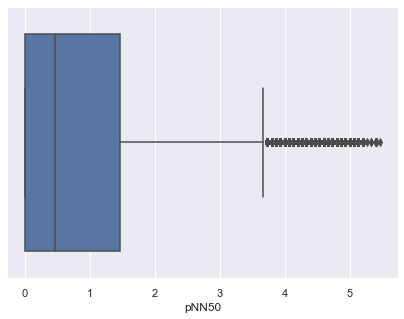

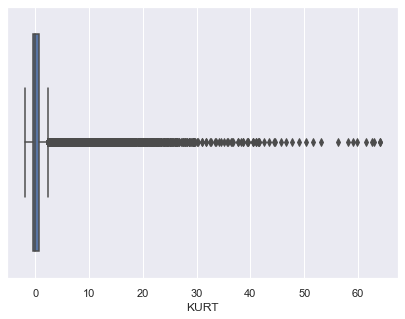

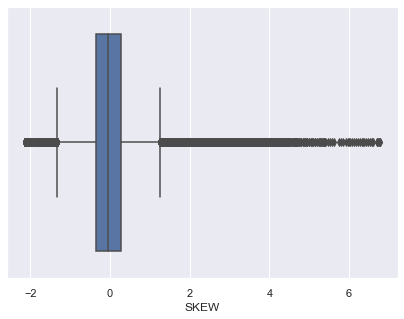

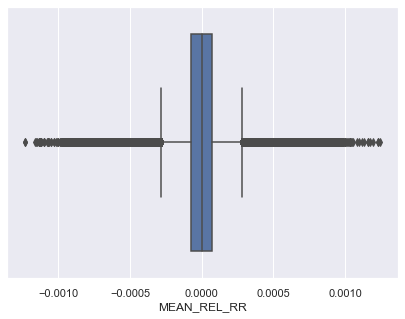

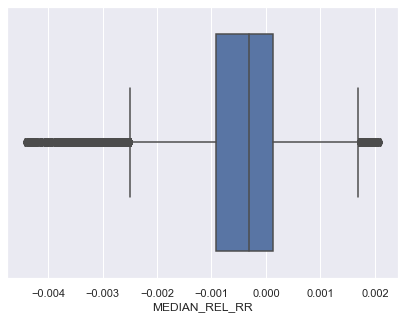

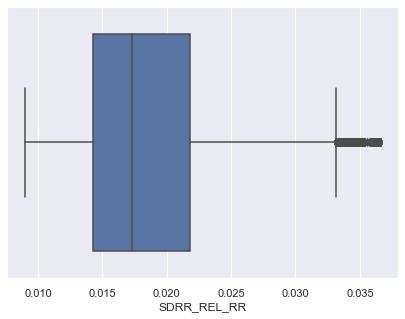

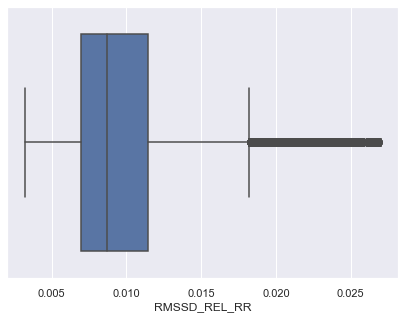

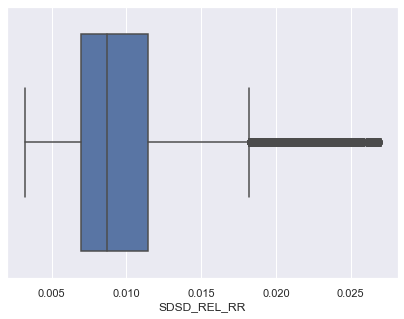

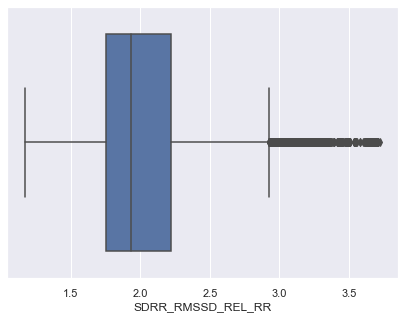

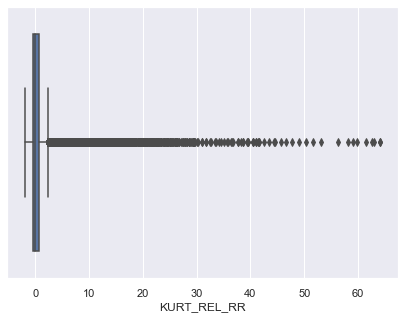

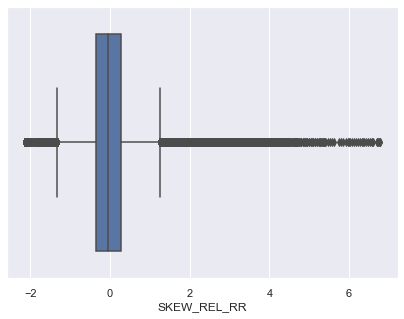

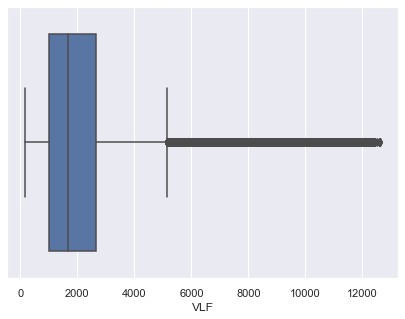

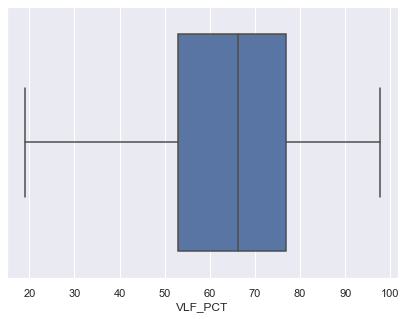

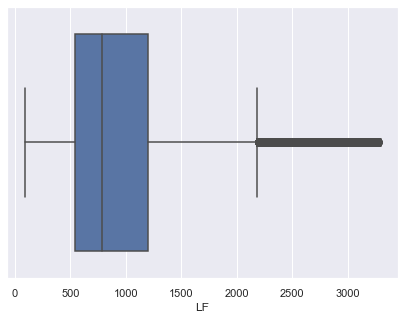

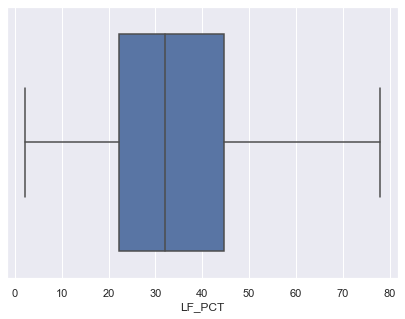

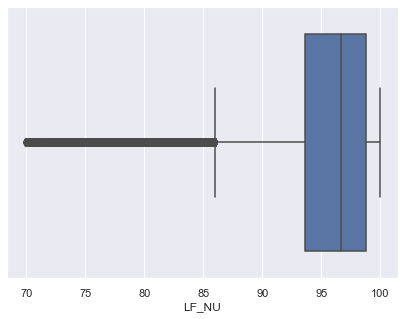

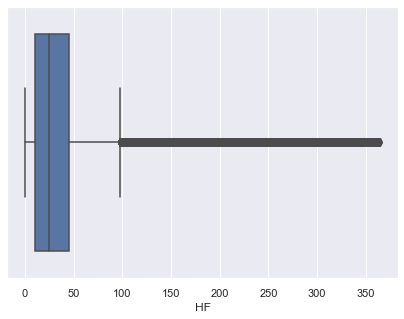

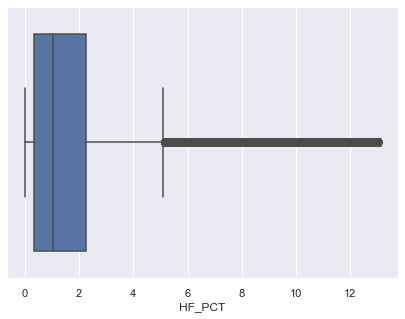

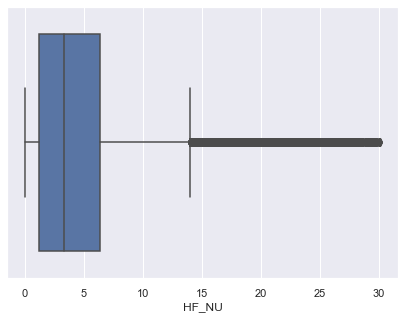

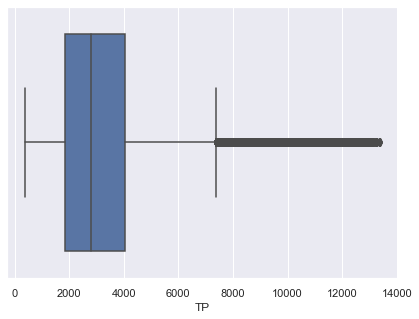

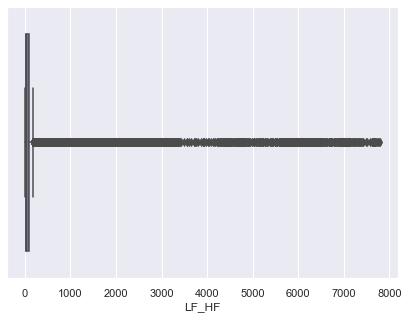

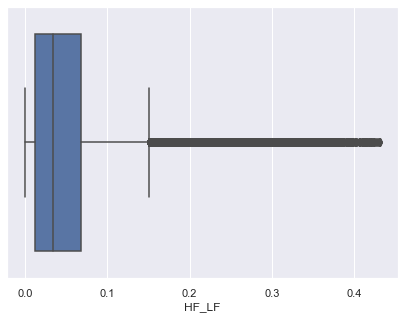

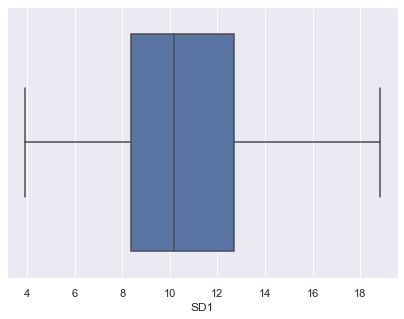

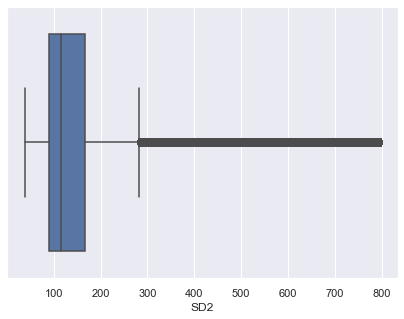

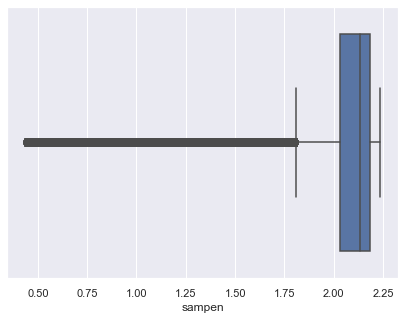

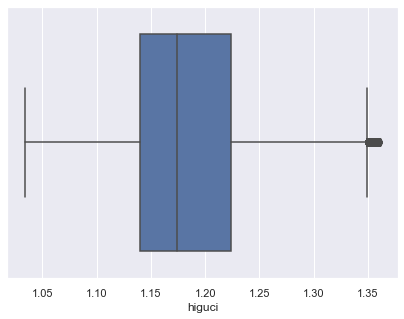

In [ ]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize = (7,5))
    sns.boxplot(df[i])
    plt.show()

Mean:  73.94182397352178 
Median:  74.21780866199228 
Mode:  48.737243024636314


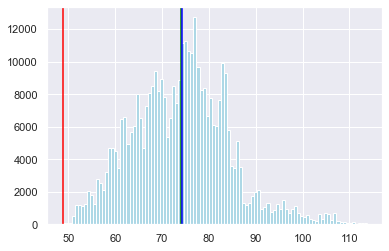

In [ ]:

# Analysing the mean, median and mode of Target field "HR"

mean = df['HR'].mean()
median = df['HR'].median()
mode = df['HR'].mode()
print ('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.hist(df['HR'],bins=100, color='lightblue')
plt.axvline(mean,color='green',label='Mean')
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

### Multivariate Analysis

In [ ]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x000001B073FF58B8> (for post_execute):


KeyboardInterrupt: 